# Домашнее задание 1. Линейные модели

### Митрофанов Дмитрий ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td style='background-color: #cc2020; color: #ffffff'>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, classification_report, f1_score
import copy
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке <= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas.

In [ ]:
bRMSE = 8
results = []
randstate = 111

In [ ]:
url = "https://gitlab.toliak.ru/Toliak/oirs-datasets/-/raw/master/Real%20estate.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

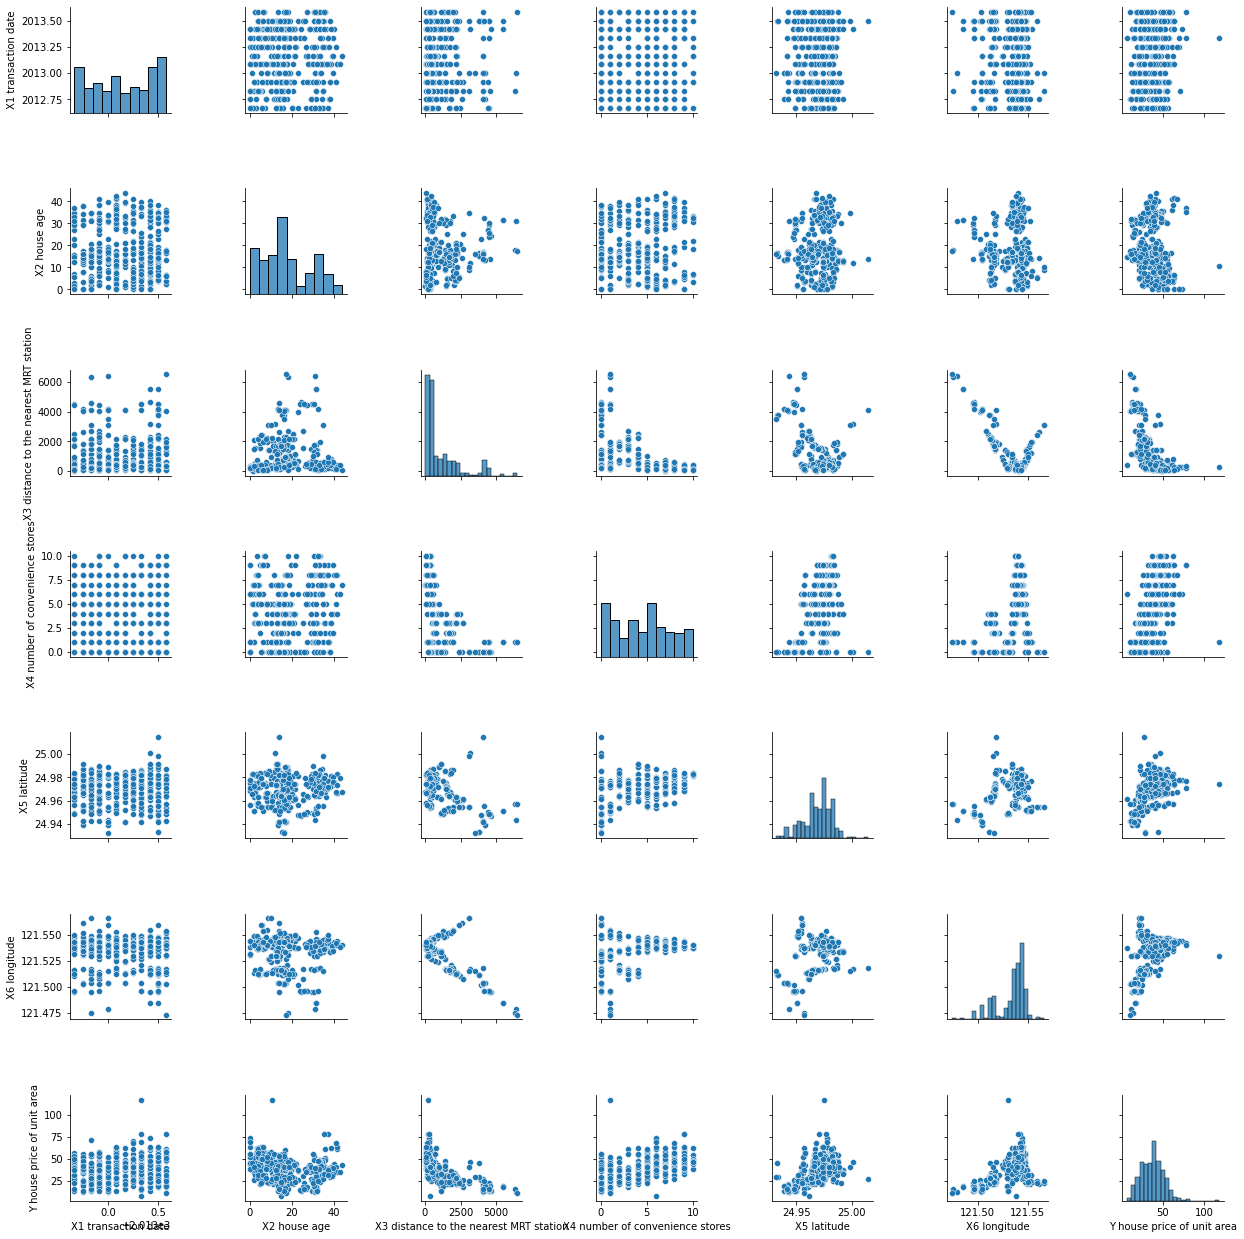

In [ ]:
sns.pairplot(data)

## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [ ]:
X = data.drop(columns='Y house price of unit area')
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=randstate
)

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки.



In [ ]:
linear = LinearRegression().fit(X_train, y_train)
y_predict = linear.predict(X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
score = linear.score(X_train, y_train)

results.append(['Linear', rmse, score])

print(f'Linear\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Linear
Score: 0.5560833713586348
RMSE: 6.917336838220686
Less baseline: True


Уберём из исходного набора данных выбросы.

In [ ]:
data2 = copy.deepcopy(data)
for cloumn in data2.columns.values.tolist():
  data2 = data2[data2[cloumn] < data2[cloumn].quantile(.95)]
#По-хорошему нужно сделать так:
#data2 = data2[data2[cloumn].between(data2[cloumn].quantile(.05), data2[cloumn].quantile(.95))]

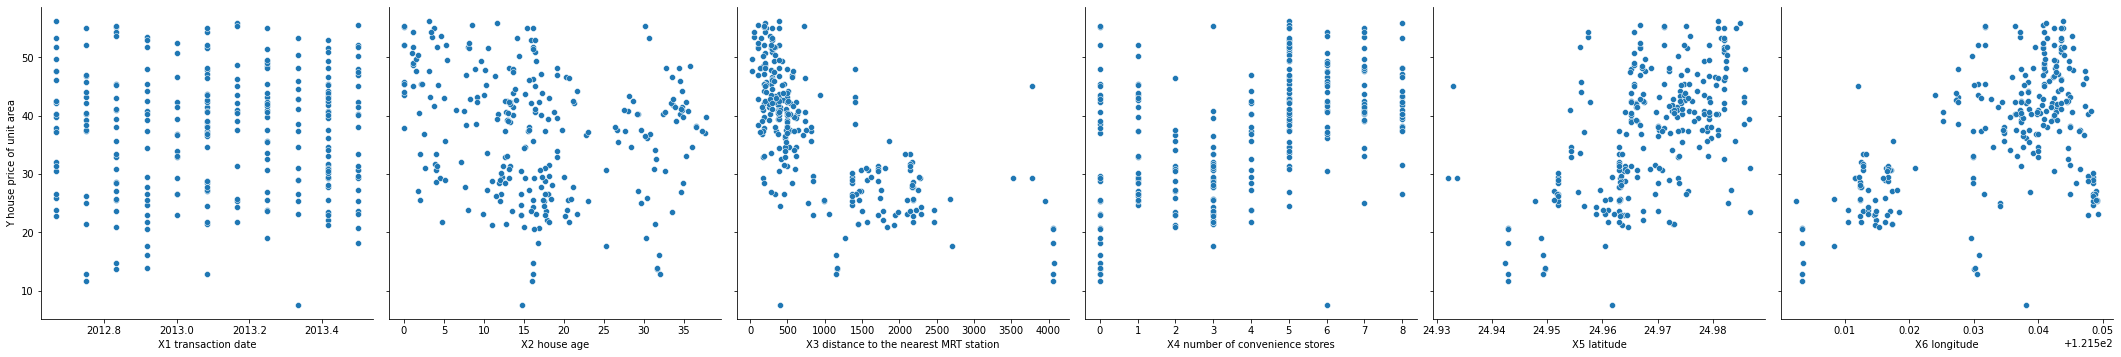

In [ ]:
sns.pairplot(
  data2, 
  x_vars = data.columns.drop('Y house price of unit area') ,
  y_vars = ['Y house price of unit area'], 
  height = 5
)

In [ ]:
X2 = data2[data2.columns.drop('Y house price of unit area')].to_numpy()
y2 = data2['Y house price of unit area'].to_numpy()

X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, 
  y2, 
  test_size=0.2, 
  random_state=randstate
)

linear = LinearRegression().fit(X2_train, y2_train)
y2_predict = linear.predict(X2_test)
rmse = mean_squared_error(y_true=y2_test, y_pred=y2_predict, squared=False)
score = linear.score(X2_train, y2_train)

results.append(['Linear (filtered)', rmse, score])

print(f'Linear (filtered)\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Linear (filtered)
Score: 0.5766559225336356
RMSE: 5.660130193753136
Less baseline: True


Из результатов видно, что среднеквадратичная ошибка значительно уменьшилась.

## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [ ]:
ridge = Ridge().fit(X_train , y_train)
y_predict = ridge.predict(X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
score = ridge.score(X_train, y_train)

results.append(['Ridge', rmse, score])

print(f'Ridge\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Ridge
Score: 0.5315670740742171
RMSE: 7.24686752174602
Less baseline: True


In [ ]:
ridge = Ridge().fit(X2_train , y2_train)
y2_predict = ridge.predict(X2_test)
rmse = mean_squared_error(y_true=y2_test, y_pred=y2_predict, squared=False)
score = ridge.score(X2_train, y2_train)

results.append(['Ridge (filtered)', rmse, score])

print(f'Ridge (filtered)\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Ridge (filtered)
Score: 0.5326196194298329
RMSE: 5.9410302697642665
Less baseline: True


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [ ]:
lasso = Lasso().fit(X_train , y_train)
y_predict = lasso.predict(X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
score = lasso.score(X_train, y_train)

results.append(['Lasso', rmse, score])

print(f'Lasso\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Lasso
Score: 0.516777234342586
RMSE: 7.569219919028438
Less baseline: True


In [ ]:
lasso = Lasso().fit(X2_train , y2_train)
y2_predict = lasso.predict(X2_test)
rmse = mean_squared_error(y_true=y2_test, y_pred=y2_predict, squared=False)
score = lasso.score(X2_train, y2_train)

results.append(['Lasso (filtered)', rmse, score])

print(f'Lasso (filtered)\nScore: {score}\nRMSE: {rmse}\nLess baseline: {rmse < bRMSE}')

Lasso (filtered)
Score: 0.5243522742635517
RMSE: 6.115402691352054
Less baseline: True


## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

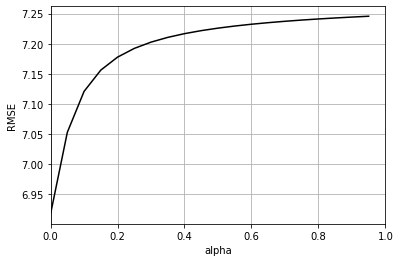

In [ ]:
plot_data = []
step = 0.05

for alpha in np.arange(0, 1, step):
  ridge = Ridge(alpha=alpha).fit(X_train , y_train)
  y_predict = ridge.predict(X_test)
  rmse = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
  plot_data.append(rmse)

plt.plot(np.arange(0, 1, step), plot_data, color="black")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.xlim([0, 1])
plt.grid(True)

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ: Точного ответа какая модель лучше - нет, так как конечный результатат
зависит от большого числа прараметров и, в большей степени, от тестовой и тренировочной выборки, так как опытным путём было замечено, что при изменении такого параметра как `random_state` изменяются и эффективности моделей, в качестве примера ниже будет представлена таблица с разными значениями `random_state` и разной эффективностью моделей.

<table>
    <thead>
      <tr>
        <td rowspan="3">Значение random_state</td>
        <td colspan="4">OLS regression</td>
        <td colspan="4">Ridge regression</td>
        <td colspan="4">Lasso regression</td>
      </tr>
      <tr>
        <td colspan="2">normal</td>
        <td colspan="2">filtered</td>
        <td colspan="2">normal</td>
        <td colspan="2">filtered</td>
        <td colspan="2">normal</td>
        <td colspan="2">filtered</td>
      </tr>
      <tr>
        <td>RMSE</td>
        <td>Score</td>
        <td>RMSE</td>
        <td>Score</td>
        <td>RMSE</td>
        <td>Score</td>
        <td>RMSE</td>
        <td>Score</td>
        <td>RMSE</td>
        <td>Score</td>
        <td>RMSE</td>
        <td>Score</td>
      </tr>
    </thead>
    <tbody>
      <tr>
            <td>15</td>
            <td>7.82837</td>
            <td>0.574973</td>
            <td>6.57201</td>
            <td>0.584541</td>
            <td>7.74996</td>
            <td>0.543362</td>
            <td>6.83881</td>
            <td>0.538274</td>
            <td>8.11393</td>
            <td>0.530697</td>
            <td>6.96658</td>
            <td>0.530649</td>
        </tr>
        <tr>
            <td>42</td>
            <td>7.31475</td>
            <td>0.55812</td>
            <td>5.5992</td>
            <td>0.592581</td>
            <td>7.47648</td>
            <td>0.53049</td>
            <td>5.71354</td>
            <td>0.5471</td>
            <td>7.71749</td>
            <td>0.513592</td>
            <td>5.78787</td>
            <td>0.539686</td>
        </tr>
        <tr>
            <td>1023</td>
            <td>7.54255</td>
            <td>0.579455</td>
            <td>7.94203</td>
            <td>0.625866</td>
            <td>7.40274</td>
            <td>0.548295</td>
            <td>8.38438</td>
            <td>0.590808</td>
            <td>7.35506</td>
            <td>0.52779</td>
            <td>8.18148</td>
            <td>0.576043</td>
        </tr>
    </tbody>
</table>

В данных условиях результаты машинного обучения показали, что модель линейной регрессии показывает наилучший результат.

In [ ]:
print("Таблица значений")
print(
    tabulate(
        [results[idx] for idx in range(len(results))], 
        headers=["Model", "RMSE", "Score"]
    )
)

Таблица значений
Model                 RMSE     Score
-----------------  -------  --------
Linear             6.91734  0.556083
Linear (filtered)  5.66013  0.576656
Ridge              7.24687  0.531567
Ridge (filtered)   5.94103  0.53262
Lasso              7.56922  0.516777
Lasso (filtered)   6.1154   0.524352


# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке <= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

In [ ]:
url = "https://gitlab.toliak.ru/Toliak/oirs-datasets/-/raw/master/WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


## 2.2 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [ ]:
# Для начала произведём обработку значений данных.
categorical_features = ['Education', 'JobInvolvement', 'JobLevel', 'JobRole']
encoding_features = ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'Over18'];
simple_features = ['Attrition', 'OverTime']
all_features = data.columns.values.tolist()

for feature in simple_features:
  data[feature] = data[feature].replace({'Yes': 1, 'No': 0}) 
# Если учесть, что есть всего два гендера, то ...
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}) 
# Иначе добавить Gender в categorical_features или encoding_features.
# В данной задаче всего два.
encoder = preprocessing.LabelEncoder()
for feature in encoding_features:
  data[feature] = encoder.fit_transform(data[feature])

data = pd.get_dummies(data, columns=categorical_features)
# Теперь необходимо пронормировать данные.
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns=data.columns)
# Теперь необходимо выделить главные компоненты.
X = data.drop(columns='Attrition')  # В таблице без 'Attrition' выделим главные компоненты.
y = data['Attrition']

pca = ExtraTreesClassifier().fit(X, y)
print(f"Число признаков:{pca.feature_importances_.size}\nВажность признаков:\n{pca.feature_importances_}")

Число признаков:52
Важность признаков:
[0.02085542 0.0273188  0.01451574 0.03463949 0.02663922 0.
 0.02681267 0.03495909 0.01901213 0.0287128  0.02953851 0.03311648
 0.03544707 0.02680408 0.03036522 0.         0.07024684 0.02758553
 0.01098256 0.02852622 0.         0.02830867 0.03351864 0.02557147
 0.03133516 0.03019717 0.0284018  0.0262258  0.02775554 0.01093307
 0.01320772 0.01517505 0.01499205 0.0047433  0.0174698  0.01328448
 0.01687263 0.00942263 0.02917039 0.01202083 0.00720728 0.00252988
 0.00149907 0.00464542 0.00520031 0.01371505 0.00337352 0.00519154
 0.002614   0.0135005  0.01157313 0.01426623]


В качестве примера уберём все признаки, влияние которых меньше 0.01.

In [ ]:
importances =  pca.feature_importances_.tolist()
idx=0
while idx < len(all_features):
  if (importances[idx] < 0.01):
    all_features.pop(idx)
    importances.pop(idx)
    idx-=1
  idx+=1

print(f"Число важных признаков: {len(all_features)}\nВажные признаки: {all_features}")

Число важных признаков: 30
Важные признаки: ['Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


Сохраняем важные признаки.

In [ ]:
data = data.filter(all_features)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1.0,1.0,0.431639,1.0,-1.000000,-0.6,-1.0,-1.000000,-0.333333,-1.0,...,-1.0,-1.000000,-1.0,-1.000000,-0.60,-1.0,-1.000000,-0.7,-0.555556,-1.000000
1,-1.0,0.0,-0.746600,0.0,-0.500000,-0.6,-1.0,-0.999032,0.333333,1.0,...,1.0,1.000000,-1.0,-0.333333,-0.50,0.0,0.333333,-0.5,-0.222222,-0.866667
2,1.0,1.0,0.819613,0.0,-0.928571,0.6,-1.0,-0.997097,1.000000,1.0,...,-1.0,-0.333333,-1.0,-1.000000,-0.65,0.0,0.333333,-1.0,-1.000000,-1.000000
3,-1.0,0.0,0.846815,0.0,-0.857143,-0.6,-1.0,-0.996130,1.000000,-1.0,...,-1.0,0.333333,-1.0,-1.000000,-0.60,0.0,0.333333,-0.6,-0.222222,-0.600000
4,-1.0,1.0,-0.299928,0.0,-0.928571,0.2,-1.0,-0.994194,-1.000000,1.0,...,-1.0,1.000000,-1.0,-0.333333,-0.70,0.0,0.333333,-0.9,-0.777778,-0.733333


## 2.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки sklearn.model_selection.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=5
)

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

In [ ]:
classification = LogisticRegression(max_iter=1000)
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Attrition: No', 'Attrition: Yes']))

print(f"f1-score: {f1_score(y_test, y_pred, average='macro')}") 

                precision    recall  f1-score   support

 Attrition: No       0.88      0.98      0.93       245
Attrition: Yes       0.80      0.33      0.46        49

      accuracy                           0.87       294
     macro avg       0.84      0.66      0.70       294
  weighted avg       0.87      0.87      0.85       294

f1-score: 0.6962385859093574


## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

In [ ]:
grid = {"C": np.linspace(0.01,0.1,10), "max_iter": [1000]}
logreg_cv = GridSearchCV(LogisticRegression(), grid, cv=4, scoring='f1_micro')
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print("score:", logreg_cv.best_score_)

{'C': 0.1, 'max_iter': 1000}
score: 0.8758503401360545


## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

Ваш ответ: По результатам машинного обучения логистическая регрессия показала наилучший результат, приближенный к условию.

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [ ]:
# Загрузим данные
url = "https://gitlab.toliak.ru/Toliak/oirs-datasets/-/raw/master/Real%20estate.csv"
data = pd.read_csv(url, index_col=0)
# Пронормируем данные
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns=data.columns)

X = data.drop(columns='Y house price of unit area')
y = data['Y house price of unit area']
# Разделим набор данных на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=5
)

In [ ]:
class SGDLinearRegression():
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon

    def fit(self, X, y, max_iter = 1000):
        error_history = []
        self.w = np.zeros(X.shape[1]) # создаём массив весов, основываясь на количестве столбцов
        self.bias = 0
        
        y = np.asarray(y)                                 # конвертируем в массив
        X = np.asarray(X)                                 # конвертируем в массив

        np.random.seed(0)                                 # задаём начальное состояние ГСЧ 

        for epoch in range(max_iter):
          y_predicted = np.zeros(len(X))
          shuffled_idx = np.random.permutation(len(X))    # создаём соучайную перестановку
          X = X[shuffled_idx]                             # мешаем с помощью неё массив X
          y = y[shuffled_idx]                             # мешаем с помощью неё массив y
          for step in range(len(X)):                      # проходим по всем обучающим наборам 
            y_predicted[step] = self.predict(X[step])     # прогнозируем значение
            sign = np.sign(y_predicted[step] - y[step])   # вычисляем знак, основываясь на спрогнозированном и тестовом (эталонном) значении
            self.w -= self.epsilon * (X[step] * sign)     # корректируем веса
            self.bias -= self.epsilon * sign              # корректируем смещение
          error_history.append(mean_squared_error(y, y_predicted, squared=False)) # вычисляем ошибку
        return error_history
    
    def predict(self, X):
        return np.dot(X, self.w) + self.bias

    def get_params(self, deep=True):
        return {"epsilon": self.epsilon}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
        
    def score(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y) 
        y_predicted = self.predict(X)
        return -mean_squared_error(y, y_predicted, squared=False)


3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

Обучим самописную модель.

SGD Linear Regression
RMSE: 0.13861316215875708



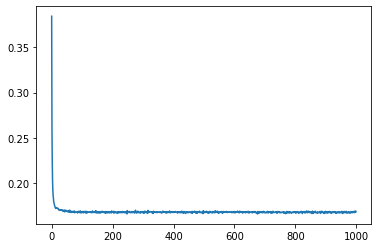

In [ ]:
linear = SGDLinearRegression()
error_history = linear.fit(X_train, y_train)
y_predict = linear.predict(X_test)
rmse = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
print(f'SGD Linear Regression\nRMSE: {rmse}\n')
plt.plot(error_history)
plt.show()

Воспользуемся sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`.

In [ ]:
grid = {"epsilon": np.geomspace(0.0001, 1, num=13)}
linreg_cv = GridSearchCV(SGDLinearRegression(), grid, n_jobs=4)
linreg_cv.fit(X_train, y_train)
print(f"Best parameters: {linreg_cv.best_params_}\nBest score: {-1 * linreg_cv.best_score_}")

Best parameters: {'epsilon': 0.00021544346900318845}
Best score: 0.16518815431370149


Для наглядности ниже будет приведены графики функций ошибки.

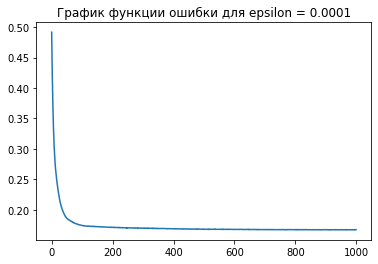

Score: 0.1387905992913066


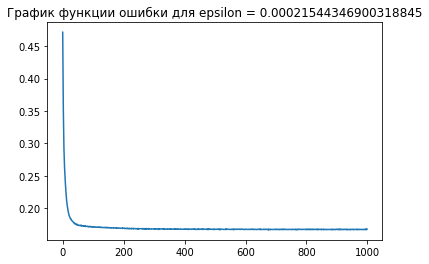

Score: 0.1387480310548064


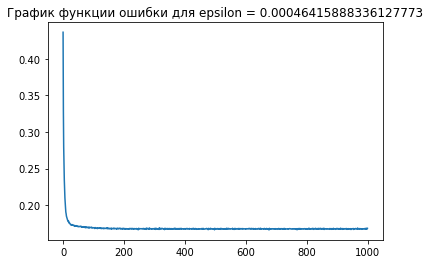

Score: 0.13876636019201213


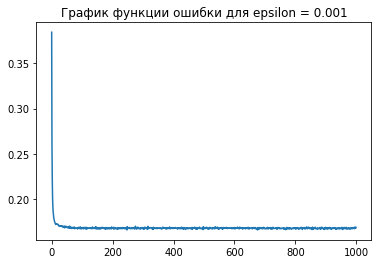

Score: 0.13861316215875708


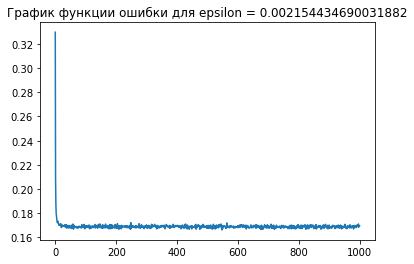

Score: 0.1397584180123649


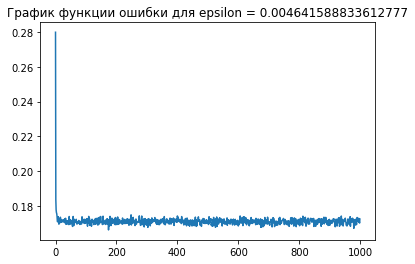

Score: 0.1477861029591054


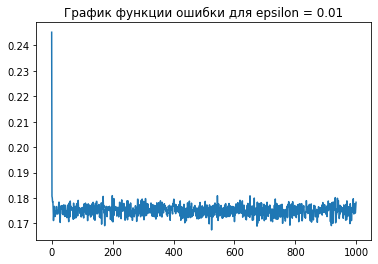

Score: 0.13640549180870173


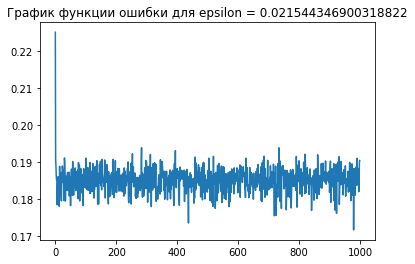

Score: 0.1399133191172552


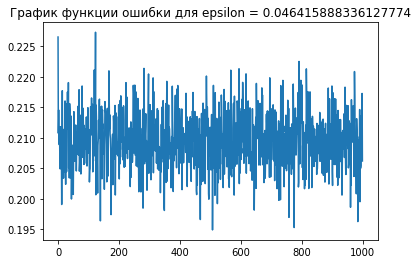

Score: 0.15470418849664785


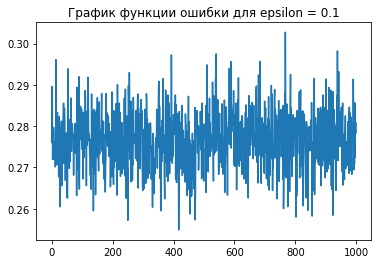

Score: 0.2532702814675755


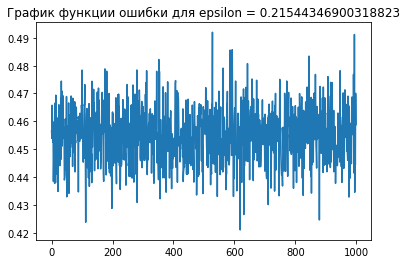

Score: 0.38831417761092574


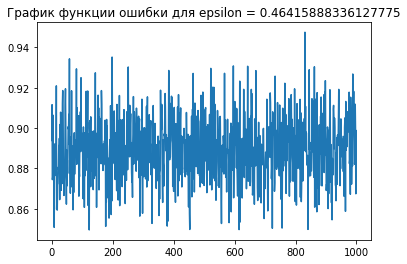

Score: 1.002512059007036


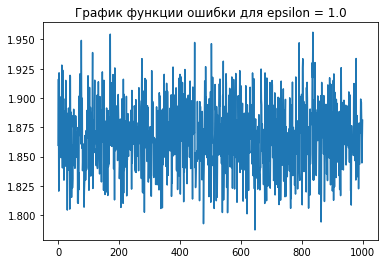

Score: 1.4964219712509146


In [ ]:
for epsilon in np.geomspace(0.0001, 1, num=13):
    linear = SGDLinearRegression(epsilon)
    error_history = linear.fit(X_train, y_train)
    y_predict = linear.predict(X_test)
    plt.plot(error_history)
    plt.title(f"График функции ошибки для epsilon = {epsilon}")
    plt.show()
    print(f"Score: {mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)}")

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

In [ ]:
from sklearn.linear_model import SGDRegressor

linear = SGDRegressor(alpha=0, max_iter=500)  # выставляем число итераций как в самописной
linear.fit(X_train, y_train)
y_predict = linear.predict(X_test)
rmse2 = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False)
print(f'SGD Linear Regression RMSE: {rmse}\nSGD Regressor RMSE: {rmse2}')

SGD Linear Regression RMSE: 0.13861316215875708
SGD Regressor RMSE: 0.15310322898236364


Ваш вывод (2-3 предложения):

Самописная линейная регрессия показала результат немного лучше чем библиотечная при одинаковом значении эпох обучения и наборов входных данных. Эта небольшая погрешность может быть вызвана незначительным различием в реализациях алгоритмов, также текущим разбиемнием исходного набора данных на тестовый и обучающий.

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [ ]:
class SGDLogisticRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass


    def predict(self, X):
        # Ваш код здесь
        pass


4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

Ваш вывод (2-3 предложения):